In [1]:
import matplotlib.pyplot as plt
from hmm import *
from pyhmmer.plan7 import *

In [4]:
with HMMFile("data/DF0000014.hmm") as hmm_file:
    hmm = hmm_file.read()

In [5]:
hmm

In [2]:
fasta_file = open("./data/chr11_HSA_simple.fasta")
seqStr = fasta_file.read()
fasta_file.close()

In [2]:
#seqStr = "ACCGATACGGATACCGATAACGATACCGATACGGATACCGATAACGATACCGATACGGATACCGATAACGATATCAACATCAACATCAACATCAACATCAACATCATCATCATCATCATCGAGAGAGA"
#seqStr = "ACCGATACGGATACCGATAACGATA"
#seqStr = "ACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGATACCGAT"
seqStr = "ACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGTACGT"

In [3]:
codeMap = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
codeSeq = np.array([codeMap[b] for b in seqStr])
trainSeq = codeSeq.reshape(1, -1)

In [10]:
ms = modelSet(7, trainSeq, num_models=20)

In [11]:
ms

[(4.3576253716537394e-15,
  CategoricalHMM(n_components=7, n_features=4,
                 random_state=RandomState(MT19937) at 0x176B3C940,
                 startprob_prior=array([1., 0., 0., 0., 0., 0., 0.]))),
 (4.184153024056059e-15,
  CategoricalHMM(n_components=7, n_features=4,
                 random_state=RandomState(MT19937) at 0x176B3CC40,
                 startprob_prior=array([1., 0., 0., 0., 0., 0., 0.]))),
 (3.2890357104520263e-15,
  CategoricalHMM(n_components=7, n_features=4,
                 random_state=RandomState(MT19937) at 0x176B3D240,
                 startprob_prior=array([1., 0., 0., 0., 0., 0., 0.]))),
 (-6.245004513516506e-16,
  CategoricalHMM(n_components=7, n_features=4,
                 random_state=RandomState(MT19937) at 0x176B3CA40,
                 startprob_prior=array([1., 0., 0., 0., 0., 0., 0.]))),
 (-1.7188941242585187e-15,
  CategoricalHMM(n_components=7, n_features=4,
                 random_state=RandomState(MT19937) at 0x176B3D640,
            

In [6]:
gms = guidedModelSet(4, trainSeq, num_models=20)

Model is not converging.  Current: -17.00109418991111 is not greater than -17.00104173301442. Delta is -5.245689668953446e-05
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Model is not converging.  Current: -77.69245067048112 is not greater than -77.6695064804081. Delta is -0.0229441900730194
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
/Users/m

ValueError: startprob_ must sum to 1 (got nan)

In [7]:
gms

NameError: name 'gms' is not defined

In [7]:
sorted

[(-21922.072339198545,
  CategoricalHMM(n_components=2, n_features=4,
                 random_state=RandomState(MT19937) at 0x15CB41740,
                 startprob_prior=array([1., 0.]))),
 (-21920.19111476539,
  CategoricalHMM(n_components=2, n_features=4,
                 random_state=RandomState(MT19937) at 0x1032FDF40,
                 startprob_prior=array([1., 0.])))]

In [10]:
trimModel(model)

CategoricalHMM(n_components=23)

In [7]:
model.get_stationary_distribution()

array([0.06952716, 0.01242716, 0.09769898, 0.02536843, 0.02347051,
       0.23732172, 0.01107338, 0.16215011, 0.10216719, 0.25879537])

In [209]:
model.emissionprob_

array([[0.40438273, 0.22505953, 0.32299864, 0.04755911],
       [0.01723748, 0.71327629, 0.00383023, 0.26565599],
       [0.        , 0.59588946, 0.17055648, 0.23355406],
       [0.        , 0.20940409, 0.19221081, 0.5983851 ],
       [0.46085031, 0.02051454, 0.04368629, 0.47494886],
       [0.01455621, 0.        , 0.17983371, 0.80561008],
       [0.06150683, 0.35964126, 0.57885191, 0.        ],
       [0.02711301, 0.36757255, 0.01594393, 0.58937052],
       [0.78460508, 0.10433597, 0.08168361, 0.02937533],
       [0.        , 0.3614723 , 0.20399105, 0.43453665],
       [0.        , 0.        , 0.        , 0.        ],
       [0.49578923, 0.03833239, 0.44884481, 0.01703357],
       [0.25522867, 0.31397375, 0.3155373 , 0.11526028],
       [0.05037589, 0.20993116, 0.63612304, 0.10356991],
       [0.83426274, 0.0262139 , 0.11998849, 0.01953488],
       [0.18764422, 0.01818183, 0.49866035, 0.2955136 ],
       [0.43764472, 0.18236531, 0.        , 0.37998998],
       [0.20662605, 0.24961817,

In [9]:
def evaluate(i):
    modelU = unguidedModel(i, trainSeq)
    try:
        #distr = modelU.get_stationary_distribution()
        loopLengths = np.sort(1/modelU.get_stationary_distribution())
    except ValueError:
        loopLengths = np.array([])
    return (i, modelU.n_components, loopLengths, modelU)


In [10]:
eval_res = [evaluate(i) for i in range(168, 175)]

Fitting a model with 28727 free scalar parameters with only 16035 data points will result in a degenerate solution.
Fitting a model with 29067 free scalar parameters with only 16035 data points will result in a degenerate solution.
Fitting a model with 29409 free scalar parameters with only 16035 data points will result in a degenerate solution.
Fitting a model with 29753 free scalar parameters with only 16035 data points will result in a degenerate solution.
Fitting a model with 30099 free scalar parameters with only 16035 data points will result in a degenerate solution.
Fitting a model with 30447 free scalar parameters with only 16035 data points will result in a degenerate solution.
Fitting a model with 30797 free scalar parameters with only 16035 data points will result in a degenerate solution.


In [23]:
eval_res[5]

(173,
 173,
 array([2.79815708e+01, 3.58527426e+01, 3.76450859e+01, 4.18057908e+01,
        4.59383791e+01, 4.68365273e+01, 4.80763882e+01, 4.89297974e+01,
        5.08355757e+01, 5.15459418e+01, 5.54100958e+01, 5.58770625e+01,
        5.64301436e+01, 5.65468758e+01, 5.77084175e+01, 5.80207516e+01,
        5.87629867e+01, 5.87942877e+01, 6.05867573e+01, 6.26288278e+01,
        6.26623892e+01, 6.27004468e+01, 6.27602217e+01, 6.29753075e+01,
        6.43909100e+01, 6.49950596e+01, 6.73707801e+01, 7.26323782e+01,
        7.85941336e+01, 8.04495573e+01, 8.14116980e+01, 8.40023338e+01,
        8.69139829e+01, 8.77147568e+01, 9.40290490e+01, 9.43058710e+01,
        9.45546913e+01, 9.64530587e+01, 9.80627106e+01, 1.03241405e+02,
        1.11150489e+02, 1.19318326e+02, 1.21051689e+02, 1.21312047e+02,
        1.23400392e+02, 1.24976093e+02, 1.30416361e+02, 1.31285381e+02,
        1.36583645e+02, 1.36812987e+02, 1.37104597e+02, 1.38599942e+02,
        1.38760882e+02, 1.40356246e+02, 1.42523385e+

In [150]:
model.emissionprob_

array([[0.29255551, 0.19231849, 0.21246569, 0.3026603 ]])

In [151]:
model.startprob_

array([1.])

In [103]:
def coverageGuided(num_states):
    model = hmm.CategoricalHMM(n_components=num_states, transmat_prior=transMatrix(num_states, 0.9), emissionprob_prior=np.ones(4)*0.25, startprob_prior=np.append([1.], np.zeros(num_states - 1)))
    model.fit(trainSeq)
    return model.score(trainSeq)

In [108]:
model = guidedModel(172)

In [112]:
model.fit(trainSeq)

Fitting a model with 30099 free scalar parameters with only 16035 data points will result in a degenerate solution.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.


CategoricalHMM(emissionprob_prior=array([0.25, 0.25, 0.25, 0.25]),
               n_components=172, n_features=4,
               random_state=RandomState(MT19937) at 0x110D9D840,
               startprob_prior=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0...
       [5.84795322e-04, 5.84795322e-04, 5.84795322e-04, ...,
        5.84795322e-04, 5.84795322e-04, 5.84795322e-04],
       ...,
       [5.84795322e-04, 5.84795322e-04, 5.84795322e-04, ...,
        5.84795322e-04, 9.00000000e-01, 5.84795322e-04],
       [5.84795322e-04, 5.84795322e-04, 5.84795322e-04, ...,
        5.84795322e-04, 5.84795322e-04, 9.00000000e-01],
       [9.00000000e-01, 5.84795322e-04, 5.84795322e-04, ...,
        5.84795322e-04, 5.84795322e-04, 5.84795322e-04]]))

In [84]:
model.fit(trainSeq)

Fitting a model with 29753 free scalar parameters with only 16035 data points will result in a degenerate solution.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.


CategoricalHMM(n_components=171, n_features=4,
               random_state=RandomState(MT19937) at 0x110D9D840,
               transmat_prior=array([[5.88235294e-04, 9.00000000e-01, 5.88235294e-04, ...,
        5.88235294e-04, 5.88235294e-04, 5.88235294e-04],
       [5.88235294e-04, 5.88235294e-04, 9.00000000e-01, ...,
        5.88235294e-04, 5.88235294e-04, 5.88235294e-04],
       [5.88235294e-04, 5.88235294e-04, 5.88235294e-04, ...,
        5.88235294e-04, 5.88235294e-04, 5.88235294e-04],
       ...,
       [5.88235294e-04, 5.88235294e-04, 5.88235294e-04, ...,
        5.88235294e-04, 9.00000000e-01, 5.88235294e-04],
       [5.88235294e-04, 5.88235294e-04, 5.88235294e-04, ...,
        5.88235294e-04, 5.88235294e-04, 9.00000000e-01],
       [9.00000000e-01, 5.88235294e-04, 5.88235294e-04, ...,
        5.88235294e-04, 5.88235294e-04, 5.88235294e-04]]))

In [133]:
np.nonzero(model.transmat_[7])

(array([ 51,  62, 164]),)

In [145]:
model.transmat_[126][7]

0.7800706916580139

In [97]:
np.sum(model.emissionprob_,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1.])

In [74]:
for i in range(1,50):
    print([i , coverage(i)])

[1, -21927.393910941235]
[2, -21833.7445519936]
[3, -21787.59647615768]
[4, -21703.502678196084]
[5, -21655.348489154367]
[6, -21389.565436639943]
[7, -21202.129212655444]
[8, -21478.749279219428]
[9, -21012.443093995633]
[10, -21320.77969125926]
[11, -21790.57842439286]
[12, -20750.01554745565]
[13, -20957.357919858838]
[14, -21142.95944509368]
[15, -21273.8906883572]
[16, -20983.518207795256]
[17, -20979.60652473003]
[18, -20632.324376878893]
[19, -20580.05746282577]
[20, -21055.914762747394]
[21, -20628.790600514858]
[22, -20452.33033410404]
[23, -20448.311664127417]
[24, -20562.06700493701]
[25, -20428.129395794396]
[26, -20495.27544413798]
[27, -20502.94897635922]
[28, -20427.915801093244]
[29, -19990.746325502892]
[30, -19424.98464371148]
[31, -19726.805614436253]
[32, -20619.829652329066]
[33, -20384.41849447994]
[34, -19335.84975626442]
[35, -19947.92114461617]
[36, -19773.561418958674]
[37, -20070.28393226507]
[38, -19911.682876754145]
[39, -20034.669294945048]
[40, -19785.615

In [75]:
for i in range(1,50):
    print([i , coverageGuided(i)])

[1, -21927.393910941235]
[2, -21895.015958981276]
[3, -21637.242538994284]


Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.


[4, -21238.71760206324]
[5, -21290.26407981756]


Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.
Some rows of transmat_ have zero sum because no transition from the state was ever observed.


ValueError: transmat_ rows must sum to 1 (got [1. 1. 1. 0. 1. 1.])

In [15]:
np.array([codeSeq]).size

16035

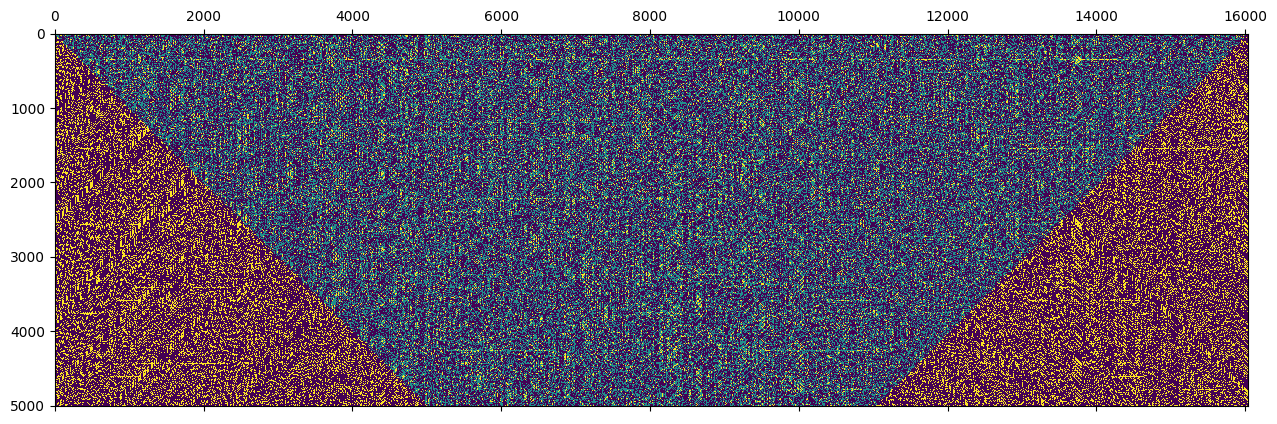

In [4]:
plt.matshow(repeats)

In [5]:
usRepeats = uniformSmooth(repeats, 1000)

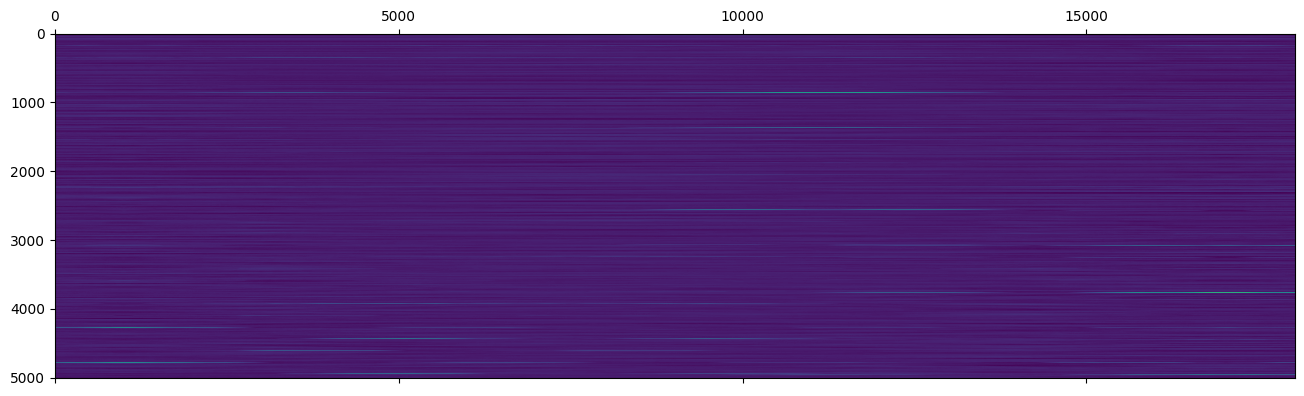

In [6]:
plt.matshow(usRepeats)

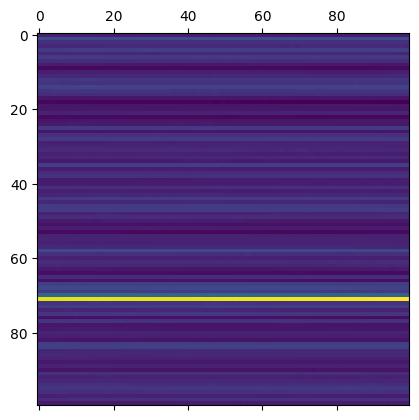

In [11]:
plt.matshow(usRepeats[100:200,12900:13000])

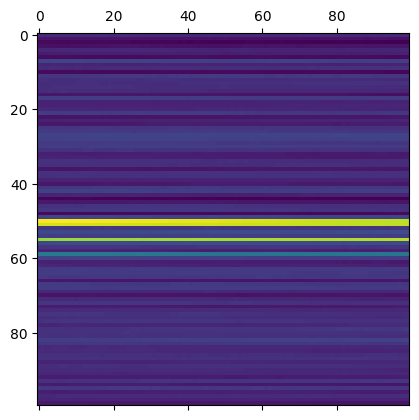

In [12]:
plt.matshow(usRepeats[800:900,12900:13000])

In [8]:
lsRepeats = linearSmooth(repeats, 1000)

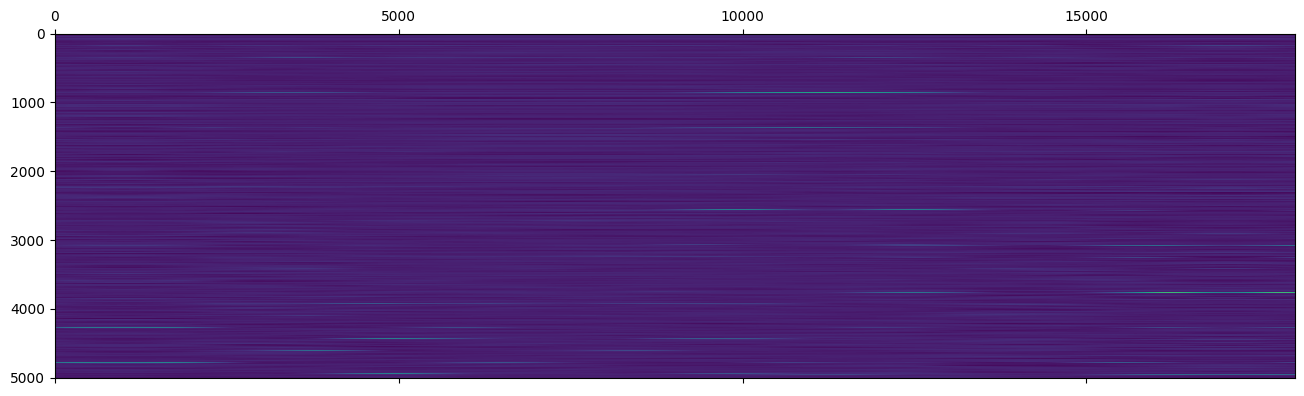

In [9]:
plt.matshow(lsRepeats)

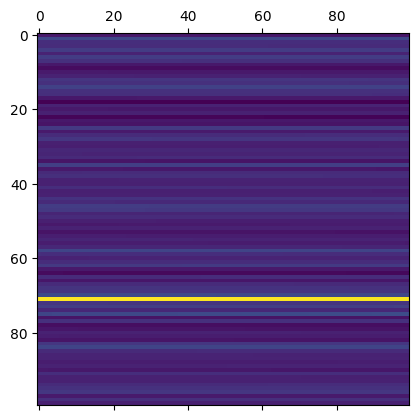

In [13]:
plt.matshow(lsRepeats[100:200,12900:13000])